In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Import the data : 
data = pd.read_csv('bank.csv')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
# Cheking for missing values : 
missing_values = data.isnull().sum()
missing_values

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [5]:
data = data.drop_duplicates()

In [6]:
data['default'] = data['default'].apply(lambda x: 1 if x == 'yes' else 0)
data['housing'] = data['housing'].apply(lambda x: 1 if x == 'yes' else 0)
data['loan'] = data['loan'].apply(lambda x: 1 if x == 'yes' else 0)
data['deposit'] = data['deposit'].apply(lambda x: 1 if x == 'yes' else 0)

In [7]:
# Select the columns :
categorical = ["job", "marital", "education", "contact","month","poutcome"]

for features in categorical :
    data[features] = data[features].astype('category').cat.codes

In [8]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


____

## Classification with decision tree : 

### Split the Data into Features and Target :

In [9]:
# Define the target variable (the column we want to predict)
y = data['deposit']  

# Define the feature variables (all other columns apart from deposit )
X = data.drop(columns='deposit')  

### Split the Data into Training and Testing Sets:

In [10]:
from sklearn.model_selection import train_test_split

# Split the data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Initialize the Decision Tree Model:

In [11]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree model
model = DecisionTreeClassifier( random_state =42) 

### Train the Model:

In [12]:
# Train the model on the training data
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### Evaluate the Model :

#### Accuracy :

In [13]:
# Evaluate the model using the test set
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy:.2f}")  

Model Accuracy: 0.76


#### Classification report : 

In [14]:
from sklearn.metrics import classification_report

# Get the classification report
report = classification_report(y_test, model.predict(X_test), output_dict=True)


# Convert the report to a DataFrame
report_df = pd.DataFrame(report).transpose()

# Save the report to a CSV file
report_df.to_csv('classification_report01.csv', index=True)

#### Confusion matrix :

In [15]:
# Predict on the test set
y_pred = model.predict(X_test)

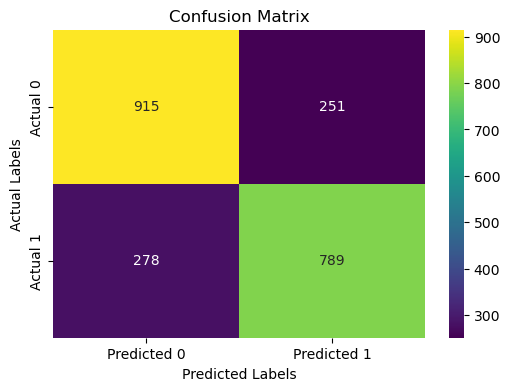

In [16]:
from sklearn.metrics import  confusion_matrix
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')

# Save the confusion matrix as a PNG file
plt.savefig('confusion_matrixTree.png', format='png')

# Optionally, display the plot
plt.show()

### Examine feature importance :

In [18]:
# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame with feature names and their corresponding importance values
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Save the DataFrame to a CSV file
importance_df.to_csv('feature_importances.csv', index=False)

importance_df 

,Feature,Importance
0,age,0.080035
1,job,0.035543
2,marital,0.013599
3,education,0.013504
4,default,0.000598
5,balance,0.079963
6,housing,0.037541
7,loan,0.006498
8,contact,0.068535
9,day,0.064132


### Remove Unimportant Features:

In [19]:
# Define the target variable (the column we want to predict)
y1 = data['deposit']  

# Define the feature variables (all other columns used for prediction)
features_to_remove = ['default', 'loan', 'education', 'marital']
X1= data.drop(columns=features_to_remove)

In [20]:
from sklearn.model_selection import train_test_split

# Split the data: 80% for training, 20% for testing
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [21]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree model
model1 = DecisionTreeClassifier(random_state =42)   # random_state for reproducibility

In [22]:
# Train the model on the training data
model1.fit(X_train1, y_train1)

DecisionTreeClassifier(random_state=42)

In [23]:
# Evaluate the model using the test set
accuracy = model1.score(X_test1, y_test1)
print(f"Model Accuracy: {accuracy:.2f}")  # Print the model accuracy

Model Accuracy: 1.00


In [24]:
from sklearn.metrics import classification_report

# Get the classification report
report = classification_report(y_test1, model1.predict(X_test1), output_dict=True)

# Convert the report to a DataFrame
report_df = pd.DataFrame(report).transpose()

# Save the report to a CSV file
report_df.to_csv('classification_report02.csv', index=True)
report 

{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1166.0},
 '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1067.0},
 'accuracy': 1.0,
 'macro avg': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 2233.0},
 'weighted avg': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 2233.0}}

### decision tree plot :

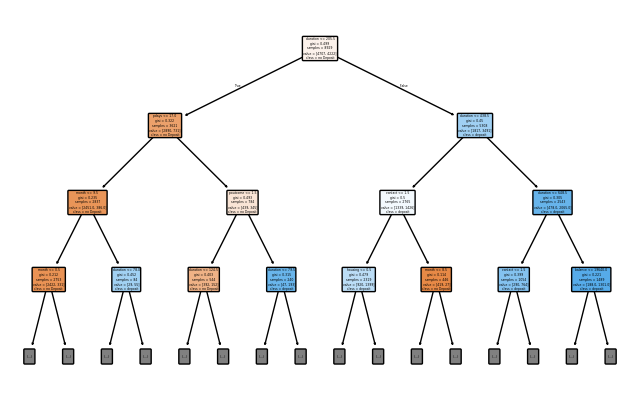

In [25]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the tree
plt.figure(figsize=(8, 5))  # Optional: Adjust the figure size for better visibility
plot_tree(model, filled=True, feature_names=X.columns, class_names=['no Deposit', 'deposit'], rounded=True, max_depth=3)

# Save the plot as PNG
plt.savefig('decision_tree2.png', format='png')

# Show the plot
plt.show()

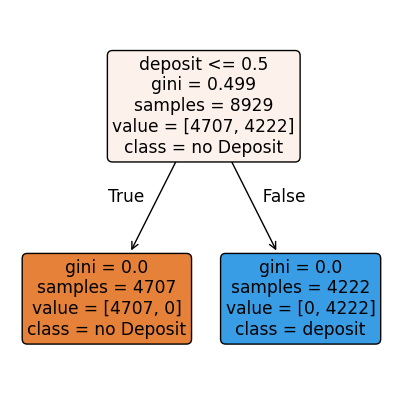

In [26]:
from sklearn.tree import plot_tree


# Plot the tree
plt.figure(figsize=(5, 5))  # Optional: Adjust the figure size for better visibility
plot_tree(model1,filled=True, feature_names=X1.columns, class_names=['no Deposit', 'deposit'], rounded=True)
plt.show()